### **MACHINE LEARNING PROJECT**

**BY:**


**ATIQUE KONDVILKAR**

Importing Modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scipy import stats
import pylab as pl
%matplotlib inline

Reading CSV File

In [ ]:
cars = pd.read_csv("/content/car data.csv")
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


Checking For Null Values

In [ ]:
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
cars["Car_Name"].value_counts()

city                      26
corolla altis             16
verna                     14
fortuner                  11
brio                      10
                          ..
Bajaj Pulsar 135 LS        1
Hero Honda Passion Pro     1
Bajaj Avenger 150          1
800                        1
land cruiser               1
Name: Car_Name, Length: 98, dtype: int64

In [ ]:
cars['car_age']= 2021-cars['Year']
cars

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


Using Box Plot & Finding Outlier

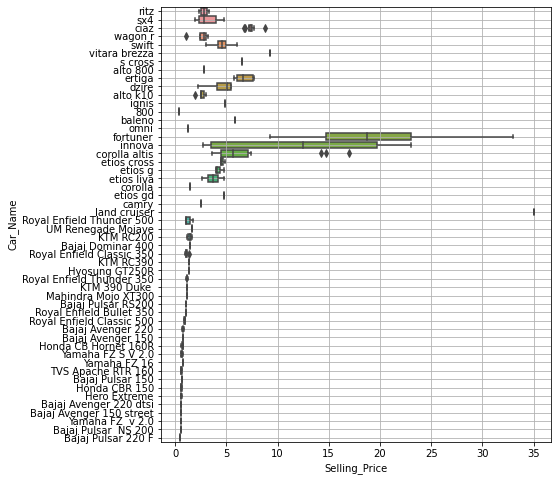

In [ ]:
#Finding Outlier for first 150
plt.figure(figsize=(7,8))
sns.boxplot(data=cars.head(150),x="Selling_Price",y="Car_Name")
plt.grid()
plt.show()

In [ ]:
# We found an outlier in corolla altis
cars[(cars["Car_Name"]=="corolla altis")&(cars["Selling_Price"]>12)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
69,corolla altis,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0,5
80,corolla altis,2016,14.73,14.89,23000,Diesel,Dealer,Manual,0,5
97,corolla altis,2017,17.00,18.64,8700,Petrol,Dealer,Manual,0,4


In [ ]:
# Found an outlier in ciaz
cars[(cars["Car_Name"]=="ciaz")&(cars["Selling_Price"]>8)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
8,ciaz,2016,8.75,8.89,20273,Diesel,Dealer,Manual,0,5


In [ ]:
# Removing the Outlier
id1=cars[(cars["Car_Name"]=="corolla altis")&(cars["Selling_Price"]>12)].index
cars.drop(id1,inplace=True)

In [ ]:
id2=cars[(cars["Car_Name"]=="ciaz")&(cars["Selling_Price"]>8)].index
cars.drop(id2,inplace=True)

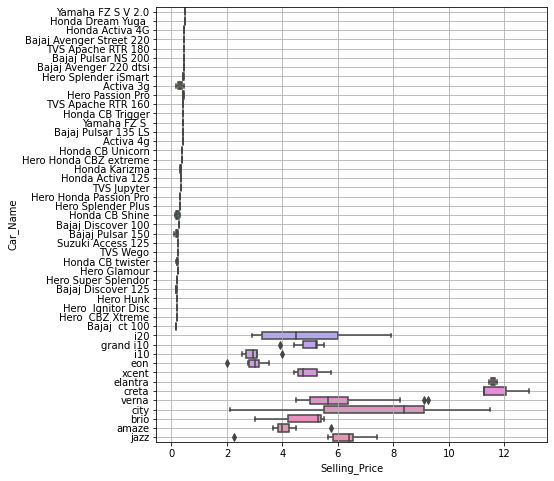

In [ ]:
#Finding Outlier for remaining 144
plt.figure(figsize=(7,8))
sns.boxplot(data=cars.tail(144),x="Selling_Price",y="Car_Name")
plt.grid()
plt.show()

In [ ]:
cars[(cars["Car_Name"]=="verna")&(cars["Selling_Price"]>9)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
231,verna,2017,9.25,9.4,15001,Petrol,Dealer,Manual,0,4
235,verna,2017,9.10,9.4,15141,Petrol,Dealer,Manual,0,4


In [ ]:
id3=cars[(cars["Car_Name"]=="verna")&(cars["Selling_Price"]>9)].index
cars.drop(id3,inplace=True)

In [ ]:
cars[(cars["Car_Name"]=="amaze")&(cars["Selling_Price"]>5)]

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
287,amaze,2015,5.75,7.5,44000,Petrol,Dealer,Automatic,0,6


In [ ]:
id3=cars[(cars["Car_Name"]=="amaze")&(cars["Selling_Price"]>5)].index
cars.drop(id3,inplace=True)

In [ ]:
cars


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car_age
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7
...,...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,5
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,6
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,12
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,4


In [ ]:
#categorical Data
cars_cat = cars.select_dtypes(object)

In [ ]:
#Numerical Data
cars_num = cars.select_dtypes(["float64","int64"])

In [ ]:
cars_cat.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


In [ ]:
cars_num.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,car_age
0,2014,3.35,5.59,27000,0,7
1,2013,4.75,9.54,43000,0,8
2,2017,7.25,9.85,6900,0,4
3,2011,2.85,4.15,5200,0,10
4,2014,4.60,6.87,42450,0,7


**Handling Categorical data and turning it to numerical**

In [ ]:
cars_cat["Fuel_Type"].value_counts()

Petrol    234
Diesel     58
CNG         2
Name: Fuel_Type, dtype: int64

In [ ]:
#One hot encoding
fuel_data = pd.get_dummies(cars_cat["Fuel_Type"])

In [ ]:
fuel_data

,CNG,Diesel,Petrol
0,0,0,1
1,0,1,0
2,0,0,1
3,0,0,1
4,0,1,0
...,...,...,...
296,0,1,0
297,0,0,1
298,0,0,1
299,0,1,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [ ]:
le.fit_transform(cars_cat["Fuel_Type"])

array([2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 2, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2,
       1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 1, 2])

In [ ]:
Car_Name_data = pd.get_dummies(cars_cat["Car_Name"])
Car_Name_data

,800,Activa 3g,Activa 4g,Bajaj ct 100,Bajaj Avenger 150,Bajaj Avenger 150 street,Bajaj Avenger 220,Bajaj Avenger 220 dtsi,Bajaj Avenger Street 220,Bajaj Discover 100,Bajaj Discover 125,Bajaj Dominar 400,Bajaj Pulsar NS 200,Bajaj Pulsar 135 LS,Bajaj Pulsar 150,Bajaj Pulsar 220 F,Bajaj Pulsar NS 200,Bajaj Pulsar RS200,Hero CBZ Xtreme,Hero Ignitor Disc,Hero Extreme,Hero Glamour,Hero Honda CBZ extreme,Hero Honda Passion Pro,Hero Hunk,Hero Passion Pro,Hero Passion X pro,Hero Splender Plus,Hero Splender iSmart,Hero Super Splendor,Honda Activa 125,Honda Activa 4G,Honda CB Hornet 160R,Honda CB Shine,Honda CB Trigger,Honda CB Unicorn,Honda CB twister,Honda CBR 150,Honda Dream Yuga,Honda Karizma,...,Yamaha FZ 16,Yamaha FZ S,Yamaha FZ S V 2.0,Yamaha Fazer,alto 800,alto k10,amaze,baleno,brio,camry,ciaz,city,corolla,corolla altis,creta,dzire,elantra,eon,ertiga,etios cross,etios g,etios gd,etios liva,fortuner,grand i10,i10,i20,ignis,innova,jazz,land cruiser,omni,ritz,s cross,swift,sx4,verna,vitara brezza,wagon r,xcent
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
297,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
298,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
299,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
le.fit_transform(cars_cat["Car_Name"])

array([90, 93, 68, 96, 92, 95, 68, 91, 68, 62, 68, 68, 76, 73, 76, 76, 76,
       96, 93, 63, 85, 93, 63, 96, 92, 92, 92, 63, 68, 90, 90, 92, 76, 73,
       93, 73,  0, 63, 93, 65, 63, 93, 73, 89, 68, 90, 96, 76, 68, 81, 81,
       86, 81, 86, 71, 77, 71, 78, 81, 71, 77, 81, 81, 81, 80, 86, 81, 71,
       80, 71, 71, 80, 77, 78, 71, 70, 71, 81, 79, 86, 86, 86, 67, 88, 71,
       80, 78, 71, 86, 86, 81, 71, 71, 86, 71, 81, 49, 56, 42, 11, 46, 43,
       40, 48, 48, 46, 42, 48, 41, 44, 46, 46, 46, 49, 46, 49, 17, 48, 45,
       46, 47, 47,  6,  4, 32, 60, 32, 58,  6,  6, 51, 14, 37, 20, 32,  7,
       37,  5, 57, 57, 12, 51, 20, 60, 15, 15, 52, 26, 16, 16, 61, 31, 54,
       60, 38, 31,  8, 52, 16,  7, 28,  1, 25, 51, 34, 28, 59, 25, 13,  2,
       35, 22, 39, 30, 53, 39, 23, 27, 33,  9, 14, 50, 55, 36, 21, 29, 14,
       10, 24, 19, 18,  3,  1, 36, 10, 33, 14, 84, 82, 83, 75, 82, 97, 82,
       84, 82, 83, 74, 72, 84, 82, 94, 75, 75, 94, 94, 75, 84, 84, 94, 94,
       83, 82, 83, 94, 84

In [ ]:
for col in cars_cat:
  le = LabelEncoder()
  cars_cat[col] = le.fit_transform(cars_cat[col])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
cars_cat.head()

,Car_Name,Fuel_Type,Seller_Type,Transmission
0,90,2,0,1
1,93,1,0,1
2,68,2,0,1
3,96,2,0,1
4,92,1,0,1


**Merging categorical and numerical column and creating new data for prediction**

In [ ]:
cars_new = pd.concat([cars_num,cars_cat],axis=1)

In [ ]:
cars_new.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,car_age,Car_Name,Fuel_Type,Seller_Type,Transmission
0,2014,3.35,5.59,27000,0,7,90,2,0,1
1,2013,4.75,9.54,43000,0,8,93,1,0,1
2,2017,7.25,9.85,6900,0,4,68,2,0,1
3,2011,2.85,4.15,5200,0,10,96,2,0,1
4,2014,4.60,6.87,42450,0,7,92,1,0,1


In [ ]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 294 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Year           294 non-null    int64  
 1   Selling_Price  294 non-null    float64
 2   Present_Price  294 non-null    float64
 3   Kms_Driven     294 non-null    int64  
 4   Owner          294 non-null    int64  
 5   car_age        294 non-null    int64  
 6   Car_Name       294 non-null    int64  
 7   Fuel_Type      294 non-null    int64  
 8   Seller_Type    294 non-null    int64  
 9   Transmission   294 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 25.3 KB


**CONCLUSION**

1) We have done all the Algorithms of EDA and preprosessing

2) We had prepared the New data for ML algorithm i.e (cars_new)

3) We have 0 null values in and all the values are in NUMERICAL

**Spilliting Test And Train Values**

In [ ]:
X = cars_new.iloc[:, :-1].values
y = cars_new.iloc[:, -1].values
# Splitting the data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**# Algorithm 1- DecisionTree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model = DecisionTreeClassifier()

Model.fit(X_train, y_train)

y_pred = Model.predict(X_test)

In [ ]:
# Predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.96      0.95      0.95        55

    accuracy                           0.92        59
   macro avg       0.68      0.72      0.70        59
weighted avg       0.92      0.92      0.92        59

[[ 2  2]
 [ 3 52]]


In [ ]:
# Accuracy score
print('accuracy is',accuracy_score(y_pred,y_test))
print('accuracy in % is',accuracy_score(y_pred,y_test)*100)

accuracy is 0.9152542372881356
accuracy in % is 91.52542372881356


**#Algorithm 2- RandomForest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)
y_pred=Model.predict(X_test)

In [ ]:
model.score(X_test, y_test)

0.9491525423728814

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[ 2,  2],
       [ 1, 54]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.96      0.95      0.95        55

    accuracy                           0.92        59
   macro avg       0.68      0.72      0.70        59
weighted avg       0.92      0.92      0.92        59



In [ ]:
#Accuracy Score
print('accuracy is: ',accuracy_score(y_pred,y_test))
print('accuracy in percentage:',accuracy_score(y_pred,y_test)*100)

accuracy is:  0.9152542372881356
accuracy in percentage: 91.52542372881356


Text(69.0, 0.5, 'Predicteed')

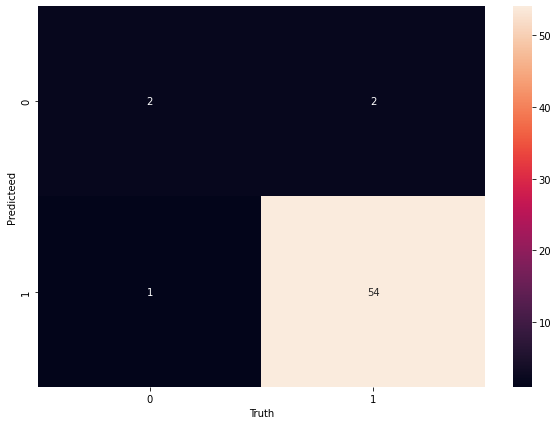

In [ ]:
#Plotting Heat Map
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicteed')

**CONCLUSION**

1) We have done all the Algorithms of EDA and preprosessing

2) We had prepared the New data for ML algorithm i.e (cars_new)

3) We have 0 null values in and all the values are in NUMERICAL

4)Seperating Test and Train values

5)Applying Decision Tree Algorithm:

  Accuracy in % is 91.52542372881356

6)Applying Random Forest Algorithm:

  Accuracy in percentage: 91.52542372881356